<a href="https://colab.research.google.com/github/alifele/Bioinformatics-OpticalCNNwithFourierOptics/blob/master/SA_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class SA:
  def __init__(self, initial_values, normalized=True):

    if normalized == True:
      self.initNormalizedValues(initial_values)
    else:
      self.initNonNormalizedValues(initial_values)


    self.n0List = []
    self.n1List = []
    self.n2List = []


  def initNonNormalizedValues(self, initial_values):
    self.alpha = initial_values["sigma12"]/initial_values["sigma01"]
    self.beta = initial_values["sigma23"]/initial_values["sigma01"]
    self.T10 = initial_values["tau_p"]/initial_values["tau_10"]
    self.T21 = initial_values["tau_p"]/initial_values["tau_21"]
    self.A = initial_values["sigma01"]*initial_values["I0"]*initial_values["tau_p"]/(h_bar*omega)
    self.Phi = self.A * initial_values["f"](0)

    self.N = initial_values["N0"]+initial_values["N1"]+initial_values["N2"]
    self.n0 = initial_values["N0"]/self.N
    self.n1 = initial_values["N1"]/self.N
    self.n2 = initial_values["n3"]/self.N

    self.n0_temp = 0
    self.n1_temp = 0
    self.n2_temp = 0

    self.dT = initial_values["dT"]
    self.dZ = initial_values["dZ"]
    self.simulationTimeSteps= initial_values['simulationTimeSteps']
    self.simulationDepthSteps= initial_values['simulationDepthSteps']


  def initNormalizedValues(self, initial_values):
    self.alpha = initial_values["alpha"]
    self.beta = initial_values["beta"]
    self.T10 = initial_values["T10"]
    self.T21 = initial_values["T21"]
    self.A = initial_values["A"]
    self.Phi = self.A * initial_values["f"](0)

    self.n0 = initial_values["n0"]
    self.n1 = initial_values["n1"]
    self.n2 = initial_values["n2"]

    self.n0_temp = 0
    self.n1_temp = 0
    self.n2_temp = 0

    self.dT = initial_values["dT"]
    self.dZ = initial_values["dZ"]
    self.simulationTimeSteps= initial_values['simulationTimeSteps']
    self.simulationDepthSteps= initial_values['simulationDepthSteps']



  def simulate(self):
    for i in range(self.simulationTimeSteps):
      self.appendAll()
      self.iterate_n0()
      self.iterate_n1()
      self.iterate_n2()
      self.update_ns()
      #self.iterate_Phi()

    return np.array(self.n0List),np.array(self.n1List),np.array(self.n2List)

  def appendAll(self):
    self.n0List.append(self.n0)
    self.n1List.append(self.n1)
    self.n2List.append(self.n2)

  def update_ns(self):
    self.n0 = self.n0_temp
    self.n1 = self.n1_temp
    self.n2 = self.n2_temp

  def iterate_n0(self):
    coeff = np.array([-self.Phi, self.T10])
    var = np.array([self.n0, self.n1])
    self.n0_temp = self.Euler_solver(coeff, var, self.dT, self.n0)

  def iterate_n1(self):
    coeff = np.array([self.Phi, -(self.alpha*self.Phi+self.T10), self.T21])
    var = np.array([self.n0, self.n1, self.n2])
    self.n1_temp = self.Euler_solver(coeff, var, self.dT, self.n1)

  def iterate_n2(self):
    coeff = np.array([self.alpha*self.Phi, -self.T21])
    var = np.array([self.n0, self.n2])
    self.n2_temp = self.Euler_solver(coeff, var, self.dT, self.n2)
  

  def iterate_Phi(self):
    coeff = np.array([self.n0 + self.n1*self.alpha + self.n2*self.beta])
    var = np.array([self.Phi])
    self.Phi = self.Euler_solver(coeff, var, self.dT, self.Phi)



  def Euler_solver(self, coeffs, variables, diff, initial_value): # will return (coeffs.variables)*diff + initial value. Note that . is inner product
    return np.dot(coeffs,variables)*diff + initial_value

    

In [13]:
def f(t):
  return 1

In [14]:
initial_values = {
  "alpha" : 32, 
  "beta" : 0.1, 
  "T10" : 0.5, #?
  "T21" : 5, #?
  "A" : 2, 
  "f": f,
  "n0" : 1,
  "n1" : 0,
  "n2" : 0,
  "dT" : 0.001,
  "dZ" : 0.001,
  "simulationTimeSteps" : 2000,
  "simulationDepthSteps" : 2000
}

In [15]:
mySA = SA(initial_values, normalized=True)

In [16]:
n0,n1,n2 = mySA.simulate()

Text(0.5, 1.0, 'population Density of n1')

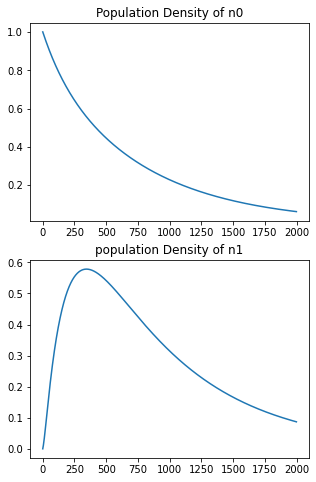

In [17]:
fig, a = plt.subplots(2,1, figsize=[5,8])
a[0].plot(n0)
a[0].set_title("Population Density of n0")
a[1].plot(n1)
a[1].set_title("population Density of n1")


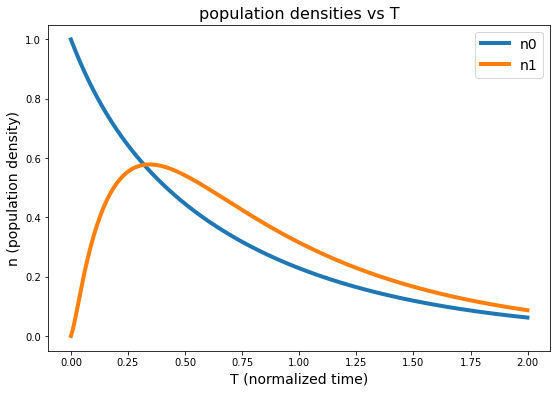

In [37]:
T = np.arange(0,initial_values['simulationTimeSteps']*initial_values['dT'], initial_values['dT'])
plt.figure(figsize=(9,6))
plt.title("population densities vs T", fontsize=16)
plt.plot(T,n0, label="n0", lw=4)
plt.plot(T,n1, label="n1", lw=4)
plt.xlabel("T (normalized time)", fontsize=14)
plt.ylabel("n (population density)", fontsize=14)
plt.legend(fontsize=14)